# Getting to Know a Dataset
### What's the best way to approach a new dataset? Learn to validate and summarize categorical and numerical data and create Seaborn visualizations to communicate your findings.

## Exploratory Data Analysis
##### Let's say we've got a new dataset about books. Is this good data? What questions can it answer for us? It's only after we understand what our data contains that we can think about how the data might be useful to us. Exploratory Data Analysis, or EDA for short, is the process of cleaning and reviewing data to derive insights such as descriptive statistics and correlation and generate hypotheses for experiments. EDA results often inform the next steps for the dataset, whether that be generating hypotheses, preparing the data for use in a machine learning model, or even throwing the data out and gathering new data!

## A first look with .head()
##### Let's begin by importing a dataset and reviewing some useful pandas methods for initial exploration! We'll import the books data from a csv file using pd.read_csv and save it as a DataFrame called "books". Taking a look at the top of the DataFrame using the head function, we can see that our data contains columns representing book names, authors, ratings, publishing years, and genres.

In [1]:
# import liberaries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
books = pd.read_csv(r"C:\Users\NEW USER\anaconda_projects\clean_books.csv")
print(books.head())

                                                name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     author  rating  year        genre  
0                  JJ Smith     4.7  2016  Non Fiction  
1              Stephen King     4.6  2011      Fiction  
2        Jordan B. Peterson     4.7  2018  Non Fiction  
3             George Orwell     4.7  2017      Fiction  
4  National Geographic Kids     4.8  2019    Childrens  


## Gathering more .info()
##### pandas also offers a quick way to summarize the number of missing values in each column, the data type of each column, and memory usage using the .info method. It looks like there are no missing values in our dataset, but it does have a variety of data types.

In [3]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    350 non-null    object 
 1   author  350 non-null    object 
 2   rating  350 non-null    float64
 3   year    350 non-null    int64  
 4   genre   350 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 13.8+ KB


## A closer look at categorical columns
##### A common question about categorical columns in a dataset is how many data points we have in each category. For example, perhaps we're interested in the genres represented in our books data. We can select the genre column and use the pandas Series method .value_counts to find the number of books with each genre.

In [4]:
books["genre"].value_counts

<bound method IndexOpsMixin.value_counts of 0      Non Fiction
1          Fiction
2      Non Fiction
3          Fiction
4        Childrens
          ...     
345    Non Fiction
346        Fiction
347    Non Fiction
348        Fiction
349      Childrens
Name: genre, Length: 350, dtype: object>

## .describe() numerical columns
##### Gaining a quick understanding of data included in numerical columns is done with the help of the DataFrame.describe method. Calling .describe on books, we see that it returns the count, mean, and standard deviation of the values in each numerical column (in this case rating and year), along with the min, max, and quartile values.

In [5]:
books.describe()

,rating,year
count,350.000000,350.000000
mean,4.608571,2013.508571
std,0.226941,3.284711
min,3.300000,2009.000000
25%,4.500000,2010.000000
50%,4.600000,2013.000000
75%,4.800000,2016.000000
max,4.900000,2019.000000


## Visualizing numerical data
##### Histograms are a classic way to look at the distribution of numerical data by splitting numerical values into discrete bins and visualizing the count of values in each bin. Throughout this course, we'll use Seaborn to explore datasets visually. Seaborn is imported as s-n-s. We'll also import matplotlib.pyplot aliased as plt. To create a histogram, we'll use sns.histplot and pass the books DataFrame as the data argument. Next, we indicate which column we'd like to use as x by passing the column name rating to the x keyword argument. After running plt.show to display the plot, we see that most books received ratings above 4.4, with very few getting ratings below 4.0. However, the bin size here is a little awkward. Ideally, we would have a bin for each tenth of a rating, such as a single bin for scores greater than 4.5 to 4.6 inclusive.

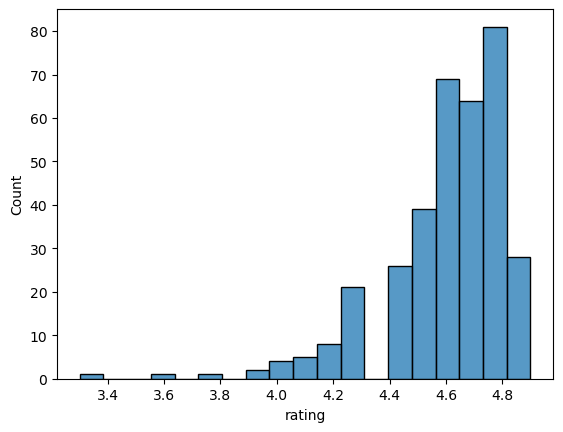

In [7]:
sns.histplot(data=books, x="rating")
plt.show()

## Adjusting bin width
##### We can set a bin width of 0.1 using the binwidth keyword argument. That's better!

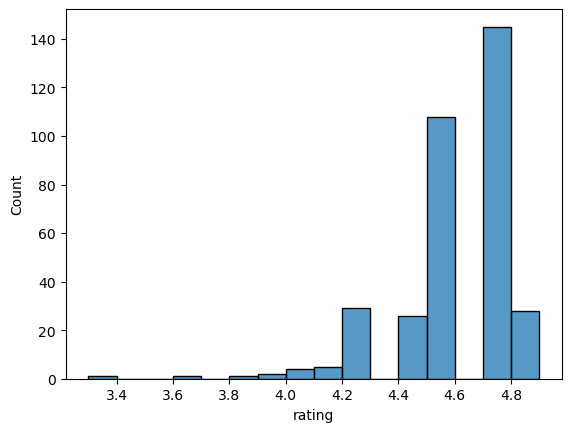

In [8]:
sns.histplot(data=books, x="rating", binwidth=.1)
plt.show()